<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Working With Data Frames
import numpy as np #Working with arrays
import tensorflow as tf # Create production-grade machine learning models on any device with TensorFlow by Google.
import ssl  #This module provides access to Transport Layer Security (often known as “Secure Sockets Layer”) encryption and peer authentication facilities for network sockets, both client-side and server-side.
ssl._create_default_https_context = ssl._create_unverified_context 
import matplotlib.pyplot as plt # Data Vizualization

# **Data**
CIFAR-10 is a dataset of 50,000 32x32 color raining images, labeled over 10 categories and 10,000 test images.

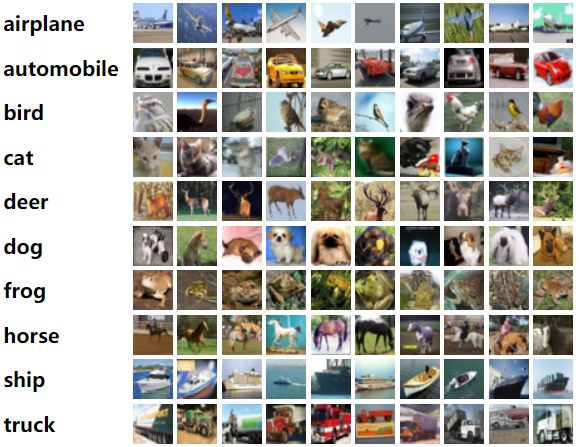

Importing the Dataset

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


Checking It's Shape

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

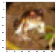

In [5]:
# FROG
plt.figure(figsize = (6,4),dpi = 16 )
plt.imshow(x_train[0])

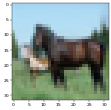

In [6]:
#Horse
plt.figure(figsize = (6,4),dpi = 32 )
plt.imshow(x_train[12])

# **PreProcessing**

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
x_train[0].shape

(32, 32, 3)

Maximum Pixel Value

In [9]:
x_train.max()

255

Normalizing the pixels

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

Checking the shape of train data sets

In [12]:
x_train.shape

(50000, 32, 32, 3)

Checking the shape of Test data sets.

In [13]:
x_test.shape

(10000, 32, 32, 3)

# **Label**

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train, 10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test, 10)

In [21]:
y_cat_test.shape

(10000, 10)

In [22]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Building the Model

###1. Sequential. 

The core idea of Sequential API is simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.

###2. Dense

Dense layer, also called fully-connected layer, refers to the layer whose inside neurons connect to every neuron in the preceding layer.

###3. Conv2D

Conv2D parameter is the numbers of filters that convolutional layers will learn from. It is an integer value and also determines the number of output filters in the convolution. Here we are learning a total of 32 filters and then we use Max Pooling to reduce the spatial dimensions of the output volume.

###4. Flatten

Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image.

###5. MaxPooling

PyTorch MaxPool2d is the class of PyTorch that is used in neural networks for pooling over specified signal inputs which internally contain various planes of input. It accepts various parameters in the class definition which include dilation, ceil mode, size of kernel, stride, dilation, padding, and return indices.

In [23]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

##ReLU. 
The ReLU function is another non-linear activation function that has gained popularity in the deep learning domain. ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time

In [25]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))


In [26]:
# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

## Kernel 

In Convolutional neural network, the kernel is nothing but a filter that is used to extract the features from the images. The kernel is a matrix that moves over the input data, performs the dot product with the sub-region of input data, and gets the output as the matrix of dot products.


## Activation

Simply put, an activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. When comparing with a neuron-based model that is in our brains, the activation function is at the end deciding what is to be fired to the next neuron.

## Input Shape

Suppose you are making a Convolutional Neural Network, now if you are aware of the theory of CNN, you must know that a CNN (2D) takes in a complete image as its input shape. And a complete image has 3 color channels that are red, green, black. So the shape of a normal image would be (height, width, color channels)

In [27]:
## SECOND SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))

In [28]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

In [29]:
# Flatten  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

In [30]:
# 256 Neurons in dense hidden layer ()
model.add(Dense(256,activation = 'relu'))

## Softmax
The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

Root Mean Squared Propagation, or RMSProp for short, is an extension to the gradient descent optimization algorithm.

In [31]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

In [32]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

## Early stopping 

It is a method that allows you to specify an arbitrarily large number of training epochs and stop training once the model performance stops improving on the validation dataset.

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

##Patience

People typically define a patience, i.e. the number of epochs to wait before early stop if no progress on the validation set. The patience is often set somewhere between 10 and 100 (10 or 20 is more common), but it really depends on your dataset and network.

In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

In [36]:
model.fit(x_train, y_cat_train, epochs = 10, 
          validation_data = (x_test,y_cat_test), 
          callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.5216 - accuracy: 0.4552 - val_loss: 1.2824 - val_accuracy: 0.5440
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1690 - accuracy: 0.5886 - val_loss: 1.1337 - val_accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0212 - accuracy: 0.6459 - val_loss: 1.1569 - val_accuracy: 0.5941
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9207 - accuracy: 0.6825 - val_loss: 1.1101 - val_accuracy: 0.6314
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8359 - accuracy: 0.7121 - val_loss: 1.0591 - val_accuracy: 0.6459
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7677 - accuracy: 0.7366 - val_loss: 0.9734 - val_accuracy: 0.6918
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7126 - accuracy: 0.7576 - val_loss: 1.0986 -

In [37]:
model.save('cifar_10epochs.h5')

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.521613,0.45516,1.282357,0.5440
1,1.168951,0.58864,1.133719,0.6028
2,1.021235,0.64588,1.156873,0.5941
3,0.920727,0.68246,1.110064,0.6314
4,0.835924,0.71210,1.059132,0.6459


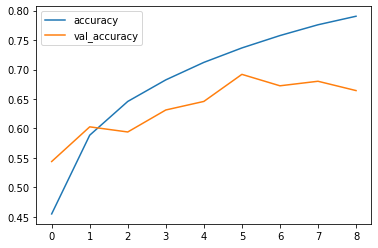

In [40]:
losses[['accuracy','val_accuracy']].plot();

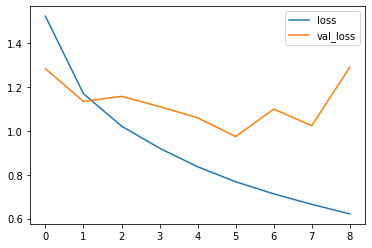

In [41]:
losses[['loss','val_loss']].plot();

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[1.2892398834228516, 0.6643000245094299]


## Classification report
It  is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

## Confusion- matrix
A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 4s 12ms/step


In [45]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1000
           1       0.87      0.77      0.82      1000
           2       0.55      0.57      0.56      1000
           3       0.52      0.47      0.49      1000
           4       0.46      0.82      0.59      1000
           5       0.61      0.58      0.59      1000
           6       0.92      0.52      0.67      1000
           7       0.73      0.73      0.73      1000
           8       0.74      0.81      0.77      1000
           9       0.82      0.68      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.67     10000
weighted avg       0.69      0.66      0.67     10000



In [46]:
confusion_matrix(y_test,predict_classes)

array([[698,  10,  59,  18,  73,  10,   3,   7,  98,  24],
       [ 46, 770,  15,  14,  20,   6,   3,  12,  49,  65],
       [ 50,   2, 571,  49, 209,  55,   7,  33,  14,  10],
       [ 22,   4,  91, 465, 163, 161,  16,  50,  18,  10],
       [ 12,   1,  36,  30, 818,  29,   4,  57,  11,   2],
       [ 14,   2,  84, 141, 103, 577,   6,  64,   6,   3],
       [  6,   6,  92,  95, 212,  37, 522,  16,   7,   7],
       [ 10,   0,  39,  38, 117,  51,   2, 733,   2,   8],
       [ 77,  14,  22,  14,  35,  11,   4,   1, 805,  17],
       [ 46,  73,  21,  23,  30,  13,   2,  31,  77, 684]])

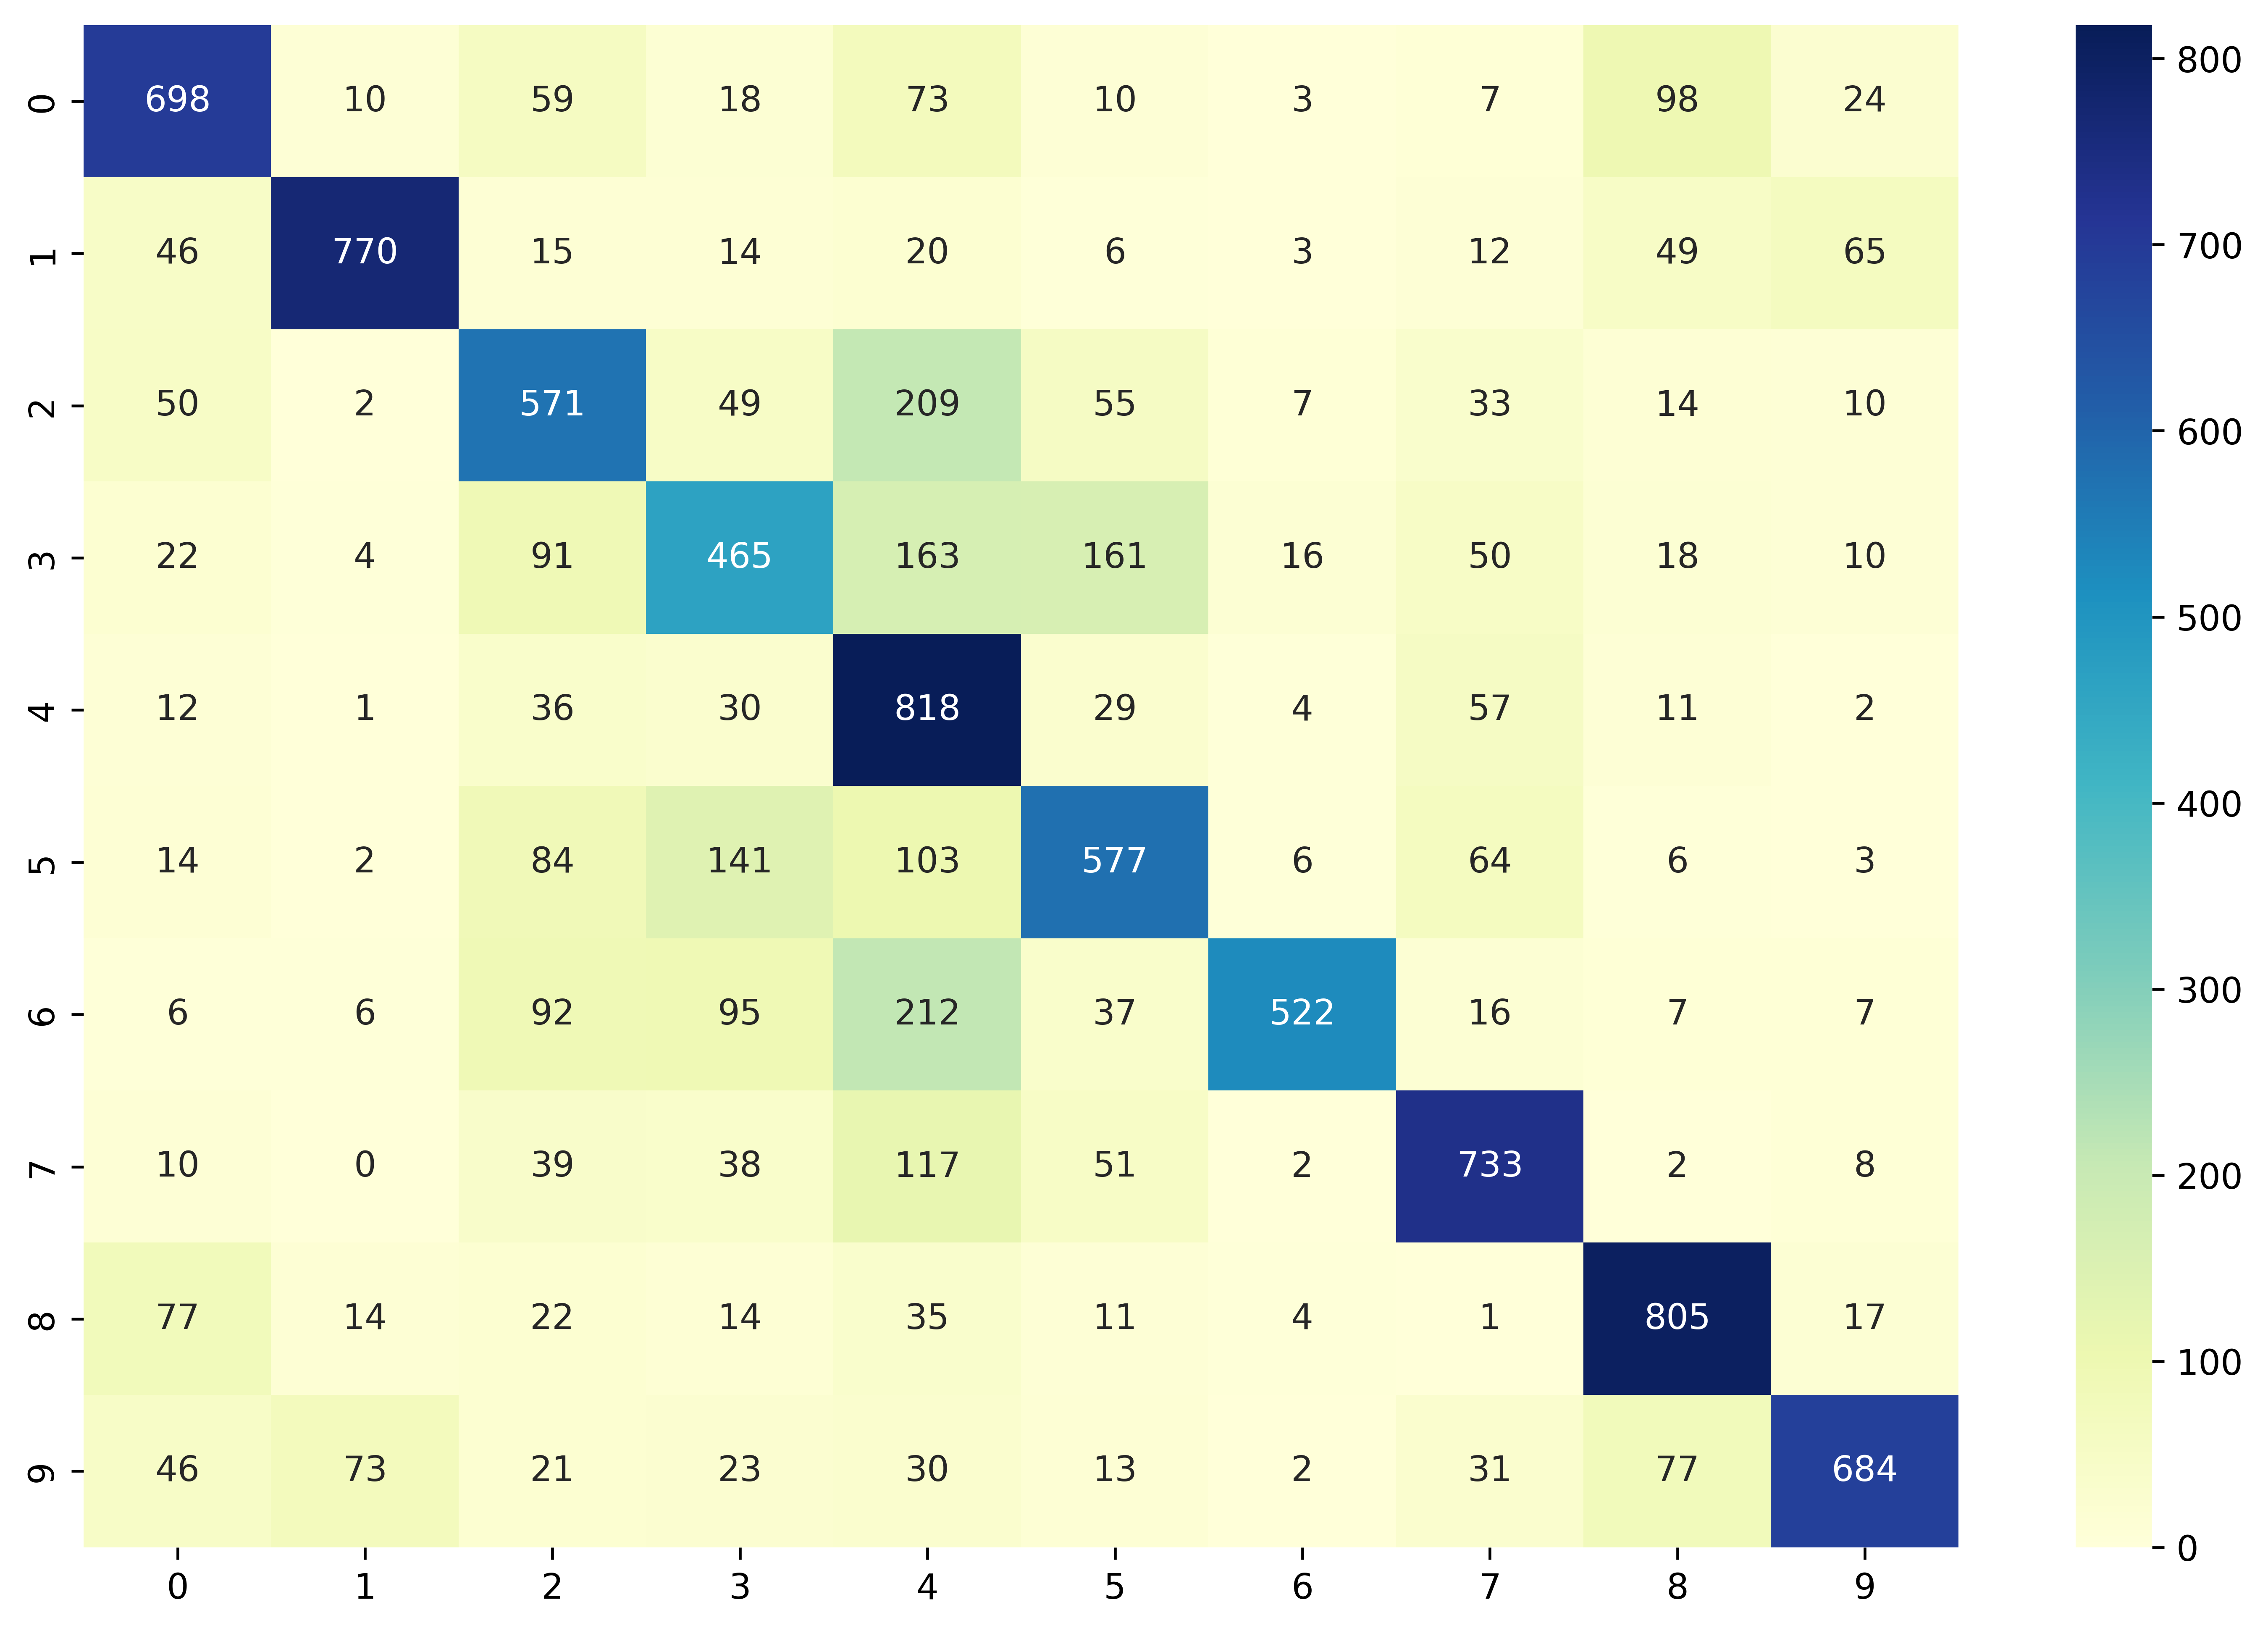

In [47]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

Predicting a given image

In [48]:
my_image = x_test[10]

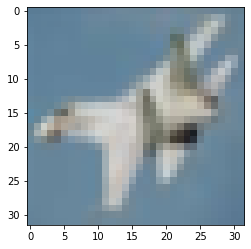

In [49]:
plt.imshow(my_image)

In [50]:
my_image = x_test[17]

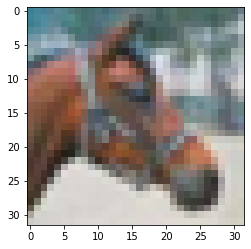

In [51]:
plt.imshow(my_image)

In [52]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 17ms/step


array([[0.000242, 0.000000, 0.009016, 0.099161, 0.094646, 0.300014,
        0.001401, 0.495487, 0.000031, 0.000002]], dtype=float32)

Getting the higher accuracy for the test Image which is 0.495487 among all the classes.


The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million 